# Importing Libraries

In [119]:
import time, datetime
import numpy as np
import pandas as pd
from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import InvalidArgumentException
import wikipedia as wiki
import seaborn as sns
from termcolor import colored

# Scraping data of the Youtube Videos Page

In [41]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

In [54]:
def get_videos(url):
    channelid = url.split('/')[4]
    PATH = 'C:\Program Files (x86)\chromedriver.exe'
    driver=webdriver.Chrome(PATH)
    driver.get(url)
    time.sleep(5)
    dt=datetime.datetime.now().strftime("%Y%m%d%H%M")
    height = driver.execute_script("return document.documentElement.scrollHeight")
    lastheight = 0
    
    while True:
    	if lastheight == height:
    		break
    	lastheight = height
    	driver.execute_script("window.scrollTo(0, " + str(height) + ");")
    	time.sleep(2)
    	height = driver.execute_script("return document.documentElement.scrollHeight")
    
    user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
    user_info = driver.find_elements_by_xpath('//*[@id="metadata-line"]')
    video_title = []
    views =[]
    posted = []
    link = []
    # print(user_data)
    for i in user_data:
        video_title.append(i.get_attribute('title'))
        link.append(i.get_attribute('href'))
    for j in user_info:
        views.append(j.text.split('\n')[0].split(' ')[0])
        posted.append(j.text.split('\n')[1])
    data = np.array([video_title,views,posted,link])
    df = pd.DataFrame({'Video_Title': data[0, :], 'Total_Views': data[1, :], 'Posted': data[2, :], 'Link': data[3, :]})
    return df

# Run the below cell for giving the input and get a dataframe as the output

In [132]:
uri = input("Please enter the URL of videos page: ")
df = get_videos(uri)
repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', }
df['Total_Views'] = df['Total_Views'].replace(repl_dict, regex=True).map(pd.eval)
# df = df.style.format({'Link': make_clickable})
df

Please enter the URL of videos page: https://www.youtube.com/c/TechWithTim/videos


,Video_Title,Total_Views,Posted,Link
0,*args & **kwargs in Python - Accept Unlimited ...,13000.0,1 day ago,https://www.youtube.com/watch?v=L9pw3kbc4KI
1,all() in Python - Check If All Items Are True,13000.0,3 days ago,https://www.youtube.com/watch?v=8__v2c588v4
2,Python Typing - Type Hints & Annotations,18000.0,5 days ago,https://www.youtube.com/watch?v=QORvB-_mbZ0
3,any() in Python - Check If An Iterable Contain...,16000.0,6 days ago,https://www.youtube.com/watch?v=h5YiHNh8S5Y
4,zip() in Python - Combine Iterables Together,15000.0,6 days ago,https://www.youtube.com/watch?v=NgIWu-lDucM
5,Make A Security Camera With Python,58000.0,1 week ago,https://www.youtube.com/watch?v=Exic9E5rNok
6,Why Random Numbers Aren't Random,25000.0,1 week ago,https://www.youtube.com/watch?v=Nm8NF9i9vsQ
7,How To Run Code In Sublime Text,19000.0,2 weeks ago,https://www.youtube.com/watch?v=haxotc0xq48
8,What Self-Taught Developers NEVER Learn,131000.0,2 weeks ago,https://www.youtube.com/watch?v=C64HXRU3GuQ
9,Make A Python Website As Fast As Possible!,89000.0,3 weeks ago,https://www.youtube.com/watch?v=kng-mJJby8g


# Cleaning the Data and transforming it into a format that can used for analysis

In [133]:
repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', }
df['Total_Views'] = df['Total_Views'].replace(repl_dict, regex=True).map(pd.eval)

In [134]:
df_live_streams = df[df['Posted'].str.contains('Streamed')]
df_videos = df[~df['Posted'].str.contains('Streamed')]

In [135]:
df.sort_values(by=['Total_Views'], ascending=False,inplace=True)
df

,Video_Title,Total_Views,Posted,Link
49,5 Mini Python Projects - For Beginners,225000.0,3 months ago,https://www.youtube.com/watch?v=DLn3jOsNRVE
8,What Self-Taught Developers NEVER Learn,131000.0,2 weeks ago,https://www.youtube.com/watch?v=C64HXRU3GuQ
36,The Magic Of Python,95000.0,2 months ago,https://www.youtube.com/watch?v=ScUKeVuL7Y8
9,Make A Python Website As Fast As Possible!,89000.0,3 weeks ago,https://www.youtube.com/watch?v=kng-mJJby8g
27,10 Python Shortcuts You Need To Know,89000.0,2 months ago,https://www.youtube.com/watch?v=CssrFJGH_dU
21,Python Is Weird...,76000.0,1 month ago,https://www.youtube.com/watch?v=hz7ipeH5Dug
55,Python FAST API Tutorial,62000.0,4 months ago,https://www.youtube.com/watch?v=-ykeT6kk4bk
5,Make A Security Camera With Python,58000.0,1 week ago,https://www.youtube.com/watch?v=Exic9E5rNok
35,How To Write Cleaner Code - A Practical Example,49000.0,2 months ago,https://www.youtube.com/watch?v=F14BKKHeAKU
18,Write Python Code Properly!,44000.0,1 month ago,https://www.youtube.com/watch?v=D4_s3q038I0


In [136]:
df_live_streams

,Video_Title,Total_Views,Posted,Link


In [138]:
df_videos.sort_values(by=['Total_Views'], ascending=False,inplace=True)

# Creating visualization for the scraped data

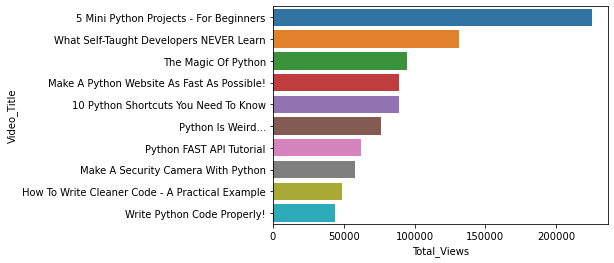

In [139]:
ax = sns.barplot(x=df_videos['Total_Views'][:10],y=df_videos['Video_Title'][:10])

In [141]:
# ax = sns.barplot(x=df_live_streams['Total_Views'],y=df_live_streams['Video_Title'])

# Now if we want to individualy search about a topic that comes up in the video than we find in the name of the videos

In [142]:
search = input("Please Enter the keyword that you would like to search: ")
# wiki.summary(search,sentences=5)
# print(result.title)
# print(wiki.page(search).original_title)
print("\n"+colored(wiki.page(search).original_title, 'grey', attrs=['bold']))
print("\n"+wiki.summary(search,sentences=5),sep='\n')

Please Enter the keyword that you would like to search: python programming

Python (programming language)

Python is an interpreted high-level general-purpose programming language. Its design philosophy emphasizes code readability with its use of significant indentation. Its language constructs as well as its object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.Guido van Rossum began working on Python in the late 1980s, as a successor to the ABC programming language, and first released it in 1991 as Python 0.9.0.
